In [1]:
import time
time.ctime()

'Fri Sep 22 12:38:06 2023'

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import importlib as il
import glob
import itertools as it
import random
import warnings
import collections
import dill

from scipy import optimize


%load_ext ipydex.displaytools
%matplotlib inline


In [3]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
vv = {"vmin": 0, "vmax": 255}

plt.rcParams['text.usetex'] = False

In [4]:
hist_dict_path = "dicts"
total_res_fpath = f"{hist_dict_path}/_total_res.dill"
hist_dict_list = glob.glob(f"{hist_dict_path}/hist_*.dill")
hist_dict_list.sort()

In [5]:
res = collections.defaultdict(list)
for hist_dict_path in hist_dict_list:
    with open(hist_dict_path, "rb") as fp:
        hist_dict = dill.load(fp)
        
    for k, v in hist_dict.items():
        if k == ('a', 'ngles'):
            print(hist_dict_path)
        res[k].extend(v)


# these have the wrong data type        
bad_cells = res.pop("bad_cells")
angles = res.pop("angles")

In [6]:
import matplotlib
q = [f.name for f in matplotlib.font_manager.fontManager.ttflist]

In [7]:
a = res[("a", "20")] ##:i

info(a) := "<class 'list'> with length: 100"

---

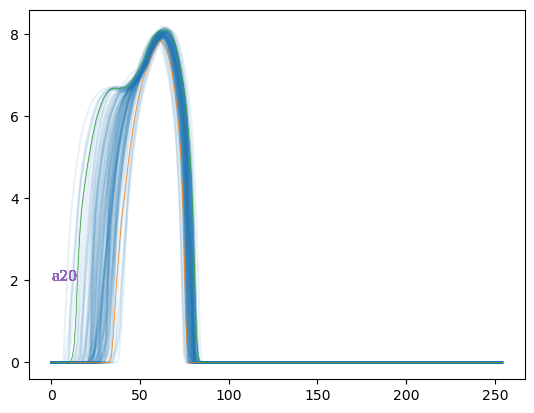

In [8]:
font = \
{
    'color':  'tab:purple',
    'family': 'serif',
    'weight': 'normal',
    # 'fontname': "cmtt10",
    'size': 10,
    
}

plt.rcParams['text.antialiased'] = True

total_res = {}

def process_hists(key, alpha=0.1, y_offset=0, save=True, plot=True):
    
    ii = np.arange(255)
    tup = (key[0], key[1:])
        
    arr = np.array(res[tup])
    q_lower, q_mid, q_upper = np.quantile(arr, (0.05, 0.5, 0.95), axis=0)
    if plot:
        for hist in res[tup]:
            plt.plot(ii, hist + y_offset, color="tab:blue", alpha=alpha)
            plt.text(0, y_offset + 2, f"{key}", fontdict=font, alpha=0.1)

        plt.plot(ii, q_lower + y_offset, color="tab:orange", lw=0.5)
        plt.plot(ii, q_upper+ y_offset, color="tab:green", lw=0.5)
        
    if save:
        total_res[tup] = {
            "q_lower": q_lower,
            "q_mid":  q_mid,
            "q_upper": q_upper,
        }

        
process_hists("a20")

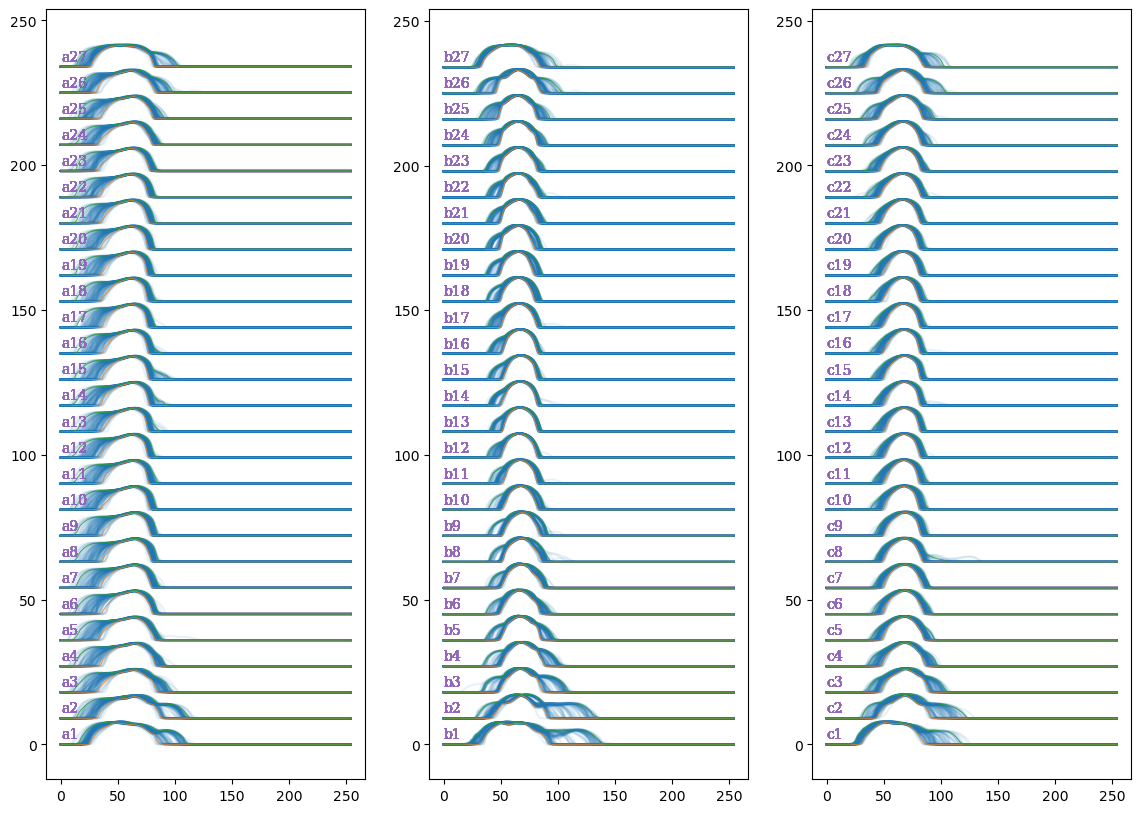

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(14, 10));

cell_tups = list(res.keys())

N = 27
for j in range(3):
    plt.sca(axes[j])
    for i, ct in enumerate(cell_tups[j*N:(j+1)*N]):
        process_hists("".join(ct), y_offset=i*9)
        

In [10]:
with open(total_res_fpath, "wb") as fp:
    dill.dump(total_res, fp)
print(f"File written: {total_res_fpath}")

File written: dicts/_total_res.dill
